In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Crashes.csv')

# View shape and preview
print("Dataset shape:", df.shape)
df.head()


/tmp/ipython-input-1-1120680855.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Crashes.csv')


Shape: (2026647, 29)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [2]:
# Count missing values in each column
df.isnull().sum().sort_values(ascending=False)


,0
VEHICLE TYPE CODE 5,2018178
CONTRIBUTING FACTOR VEHICLE 5,2017913
VEHICLE TYPE CODE 4,1995412
CONTRIBUTING FACTOR VEHICLE 4,1994330
VEHICLE TYPE CODE 3,1887792
CONTRIBUTING FACTOR VEHICLE 3,1882736
OFF STREET NAME,1691790
CROSS STREET NAME,759872
ZIP CODE,630681
BOROUGH,630441


In [9]:
columns_to_keep = [
    'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
    'ON STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED'
]

df = df[columns_to_keep]
df.head()


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,2.0,0.0
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,1.0,0.0
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,0.0,0.0
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,NaN,0.0,0.0
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,SARATOGA AVENUE,0.0,0.0


In [10]:
# Drop nulls in important columns
df.dropna(subset=['BOROUGH', 'ON STREET NAME', 'LATITUDE', 'LONGITUDE'], inplace=True)

# Confirm the new shape
print("Cleaned dataset shape:", df.shape)


Cleaned dataset shape: (1065338, 9)


In [11]:
# Convert 'CRASH DATE' to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')

# Convert 'CRASH TIME' to datetime format and extract hour
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M', errors='coerce').dt.time
df['HOUR'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M:%S', errors='coerce').dt.hour


/tmp/ipython-input-12-1707729774.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HOUR', data=df, palette='coolwarm')


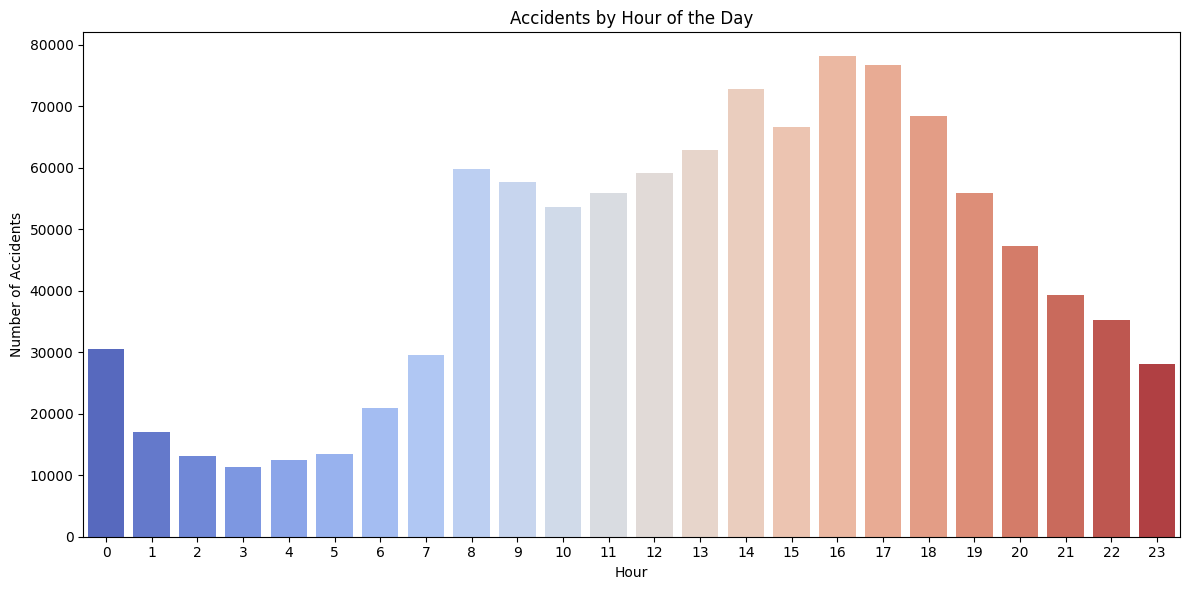

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(x='HOUR', data=df, palette='coolwarm')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-3760236237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BOROUGH', data=df, palette='Set2')


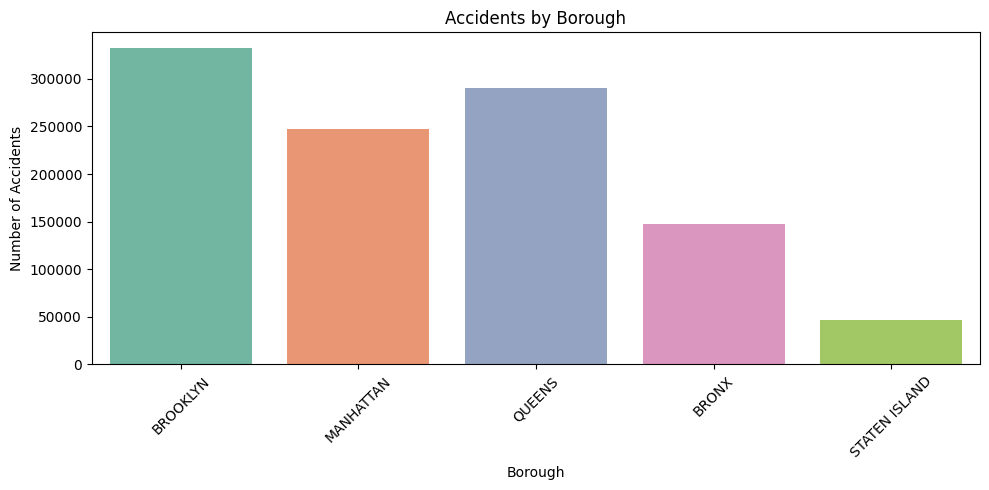

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='BOROUGH', data=df, palette='Set2')
plt.title('Accidents by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


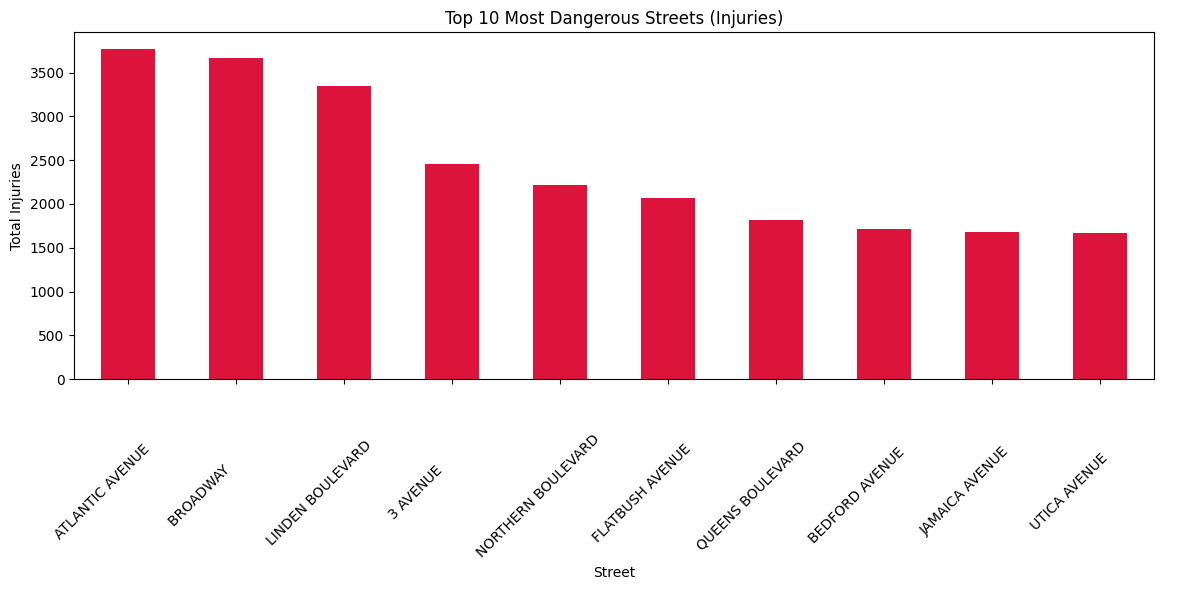

In [14]:
top_streets = df.groupby('ON STREET NAME')['NUMBER OF PERSONS INJURED'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_streets.plot(kind='bar', color='crimson')
plt.title('Top 10 Most Dangerous Streets (Injuries)')
plt.xlabel('Street')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
